In [3]:
import argparse
import numpy as np
from get_data import main
from knn.knn import KNN
from utils.display.results_display import plot_neighbors, ConfusionMatrix_display
from matplotlib import cm 

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--sets-dir', help='Path to the training and testing sets', default='../data/sets/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v -s'.split()
args, _ = parser.parse_known_args(str_args)

In [5]:
clean_movies, train_posters, train_genres, train_ids, test_posters, test_genres, test_ids, model_name, save_model, verbose = main(args)

  2%|█▌                                                                          | 249/11935 [00:00<00:04, 2436.39it/s]

Database already cleaned
Posters database downloading


 66%|█████████████████████████████████████████████████▎                         | 7838/11935 [00:02<00:01, 3079.78it/s]

Error HTTP Error 404: Not Found with film 7639
Error HTTP Error 404: Not Found with film 8090


 84%|██████████████████████████████████████████████████████████████▋            | 9968/11935 [00:03<00:00, 3180.87it/s]

Error HTTP Error 404: Not Found with film 9532


100%|██████████████████████████████████████████████████████████████████████████| 11935/11935 [00:03<00:00, 3266.60it/s]


Database downloaded
Training and testing sets already made


# Histogramme de couleurs

In [6]:
#Training sets
train_features_rgb_r = np.load('../data/features/histo_rgb_r_train.npy')
train_features_rgb_g= np.load('../data/features/histo_rgb_g_train.npy')
train_features_rgb_b = np.load('../data/features/histo_rgb_b_train.npy')
print('shape train rgb r', train_features_rgb_r.shape)
print('shape train rgb g', train_features_rgb_g.shape)
print('shape train rgb b', train_features_rgb_b.shape)

train_features_rgb = np.concatenate((train_features_rgb_r, train_features_rgb_g, train_features_rgb_b), axis=1)
print('Shape train rgb', train_features_rgb.shape)

#Testing sets
test_features_rgb_r = np.load('../data/features/histo_rgb_r_test.npy')
test_features_rgb_g = np.load('../data/features/histo_rgb_g_test.npy')
test_features_rgb_b = np.load('../data/features/histo_rgb_b_test.npy')
print('shape test rgb r', test_features_rgb_r.shape)
print('shape test rgb g', test_features_rgb_g.shape)
print('shape test rgb b', test_features_rgb_b.shape)

test_features_rgb = np.concatenate((test_features_rgb_r, test_features_rgb_g, test_features_rgb_b), axis=1)
print('Shape test rgb', test_features_rgb.shape)

shape train rgb r (4165, 256)
shape train rgb g (4165, 256)
shape train rgb b (4165, 256)
Shape train rgb (4165, 768)
shape test rgb r (734, 256)
shape test rgb g (734, 256)
shape test rgb b (734, 256)
Shape test rgb (734, 768)


In [7]:
# Training sets
train_features_lab_l = np.load('../data/features/histo_lab_l_train.npy')
train_features_lab_a= np.load('../data/features/histo_lab_a_train.npy')
train_features_lab_b = np.load('../data/features/histo_lab_b_train.npy')
print('shape train lab l', train_features_lab_l.shape)
print('shape train lab a', train_features_lab_a.shape)
print('shape train lab b', train_features_lab_b.shape)

train_features_lab = np.concatenate((train_features_lab_l, train_features_lab_a, train_features_lab_b), axis=1)

# Testing sets
test_features_lab_l = np.load('../data/features/histo_lab_l_test.npy')
test_features_lab_a = np.load('../data/features/histo_lab_a_test.npy')
test_features_lab_b = np.load('../data/features/histo_lab_b_test.npy')
print('shape test lab l', test_features_lab_l.shape)
print('shape test lab a', test_features_lab_a.shape)
print('shape test lab b', test_features_lab_b.shape)

test_features_lab = np.concatenate((test_features_lab_l, test_features_lab_a, test_features_lab_b), axis=1)

shape train lab l (4165, 256)
shape train lab a (4165, 256)
shape train lab b (4165, 256)
shape test lab l (734, 256)
shape test lab a (734, 256)
shape test lab b (734, 256)


# KNN

In [14]:
k = 3

knn = KNN(k)
knn.fit(train_features_lab, train_genres)

KNN(n_neighbors=3, verbose=True, weights='distance')

In [15]:
from utils.accuracy import mono_label
# Make prediction for each poster in the testing set
predicted_genres = knn.predict(test_features_lab, train_genres)
# Calculate the accuracy of the predictions compared to the ground truth
mono_label(test_genres, predicted_genres)

  4%|███                                                                             | 28/734 [00:00<00:02, 258.02it/s]

Predicting...


100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:02<00:00, 263.24it/s]

Prediction done


0.23024523160762944

# Display results

In [16]:
import yaml

config = yaml.safe_load(open(args.config))
class_names = {config['genres'][k]: k for k in config['genres'].keys()}

Display neighbors for a few members of the testing set

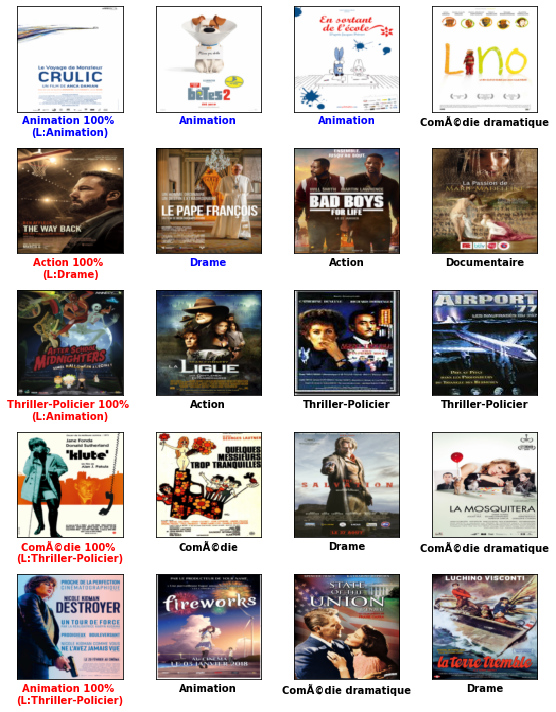

In [19]:
from utils.display.results_display import plot_neighbors
%matplotlib inline

starting_index = np.random.randint(0, 700)
num_images = 5
title = 'Histogramme LAB+kNN, k='+str(k) 
plot_neighbors(test_posters, test_genres, class_names, predicted_genres, starting_index, num_images, train_posters, train_genres, knn.neighbors, title)

Display confusion matrix

['Action', 'Animation', 'ComÃ©die', 'ComÃ©die dramatique', 'Documentaire', 'Drame', 'Thriller-Policier']


array([[0.52380952, 0.13333333, 0.14285714, 0.05714286, 0.03809524,
        0.04761905, 0.05714286],
       [0.33653846, 0.44230769, 0.10576923, 0.03846154, 0.02884615,
        0.01923077, 0.02884615],
       [0.27619048, 0.25714286, 0.31428571, 0.0952381 , 0.        ,
        0.02857143, 0.02857143],
       [0.32380952, 0.21904762, 0.18095238, 0.0952381 , 0.03809524,
        0.08571429, 0.05714286],
       [0.31428571, 0.28571429, 0.1047619 , 0.0952381 , 0.06666667,
        0.0952381 , 0.03809524],
       [0.34285714, 0.15238095, 0.20952381, 0.0952381 , 0.03809524,
        0.07619048, 0.08571429],
       [0.43809524, 0.14285714, 0.12380952, 0.0952381 , 0.04761905,
        0.05714286, 0.0952381 ]])

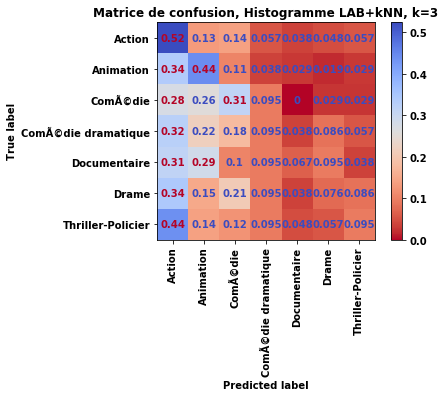

In [20]:
title = 'Histogramme LAB+kNN, k='+str(k) 
ConfusionMatrix_display(test_genres, predicted_genres, config['genres'], title)

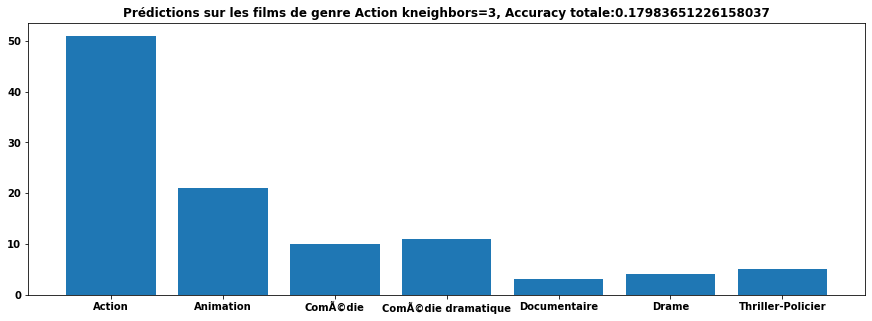

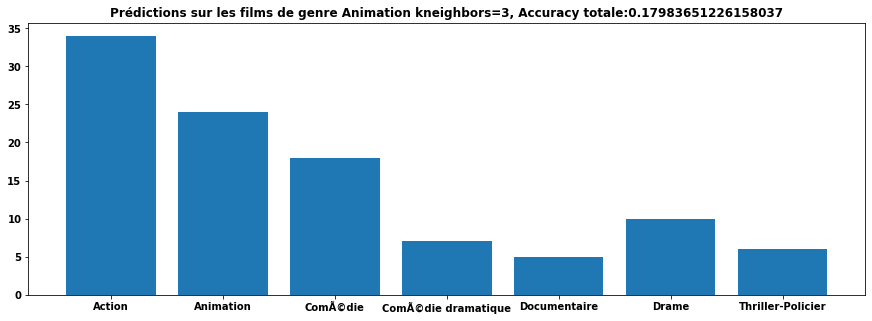

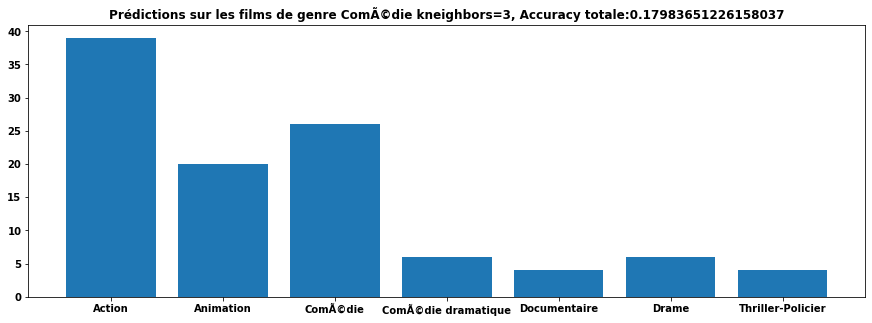

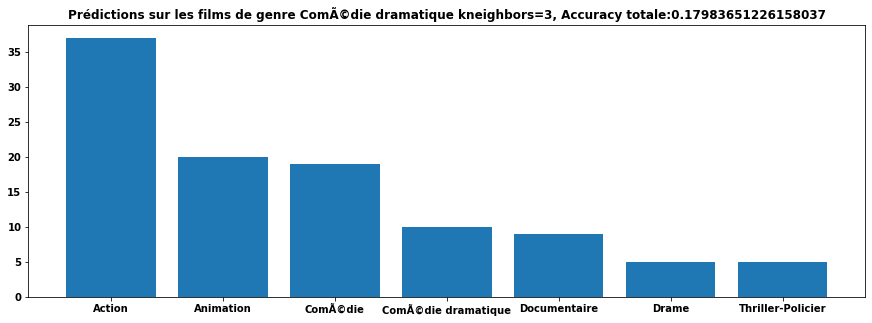

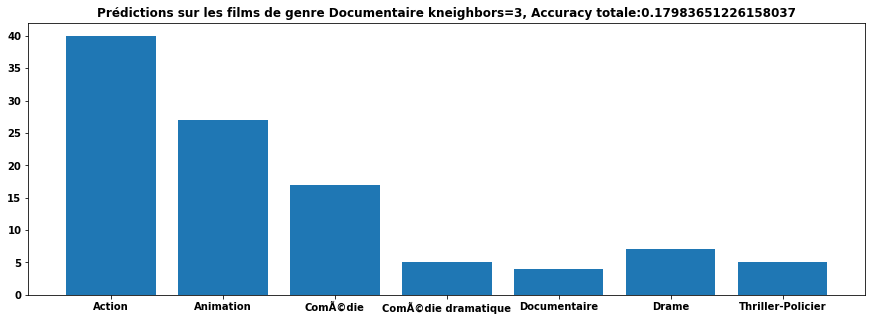

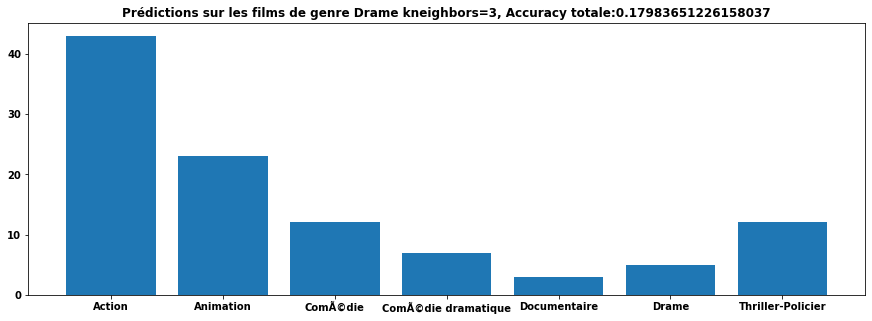

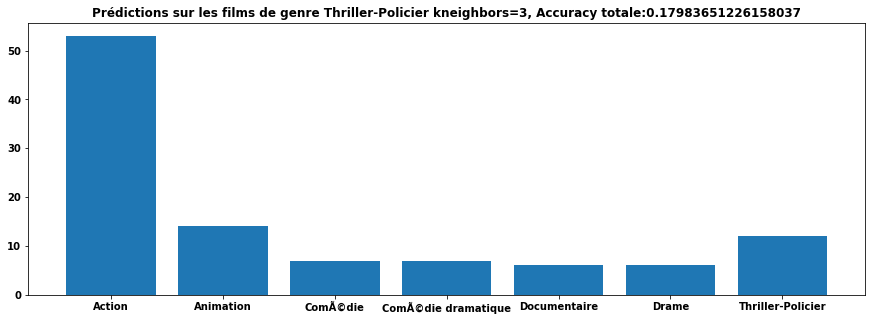

In [12]:
from utils.display.results_display import histogram
histogram(test_genres, predicted_genres, k, config['genres'])

# PARTIE SUIVANTE PAS ADAPTÉE

In [ ]:
# POUR LA METHODE RESNET :

RESNET = False #encore à faire

# POUR LES HISTOGRAMMES :

# On renseigne d'abord si on veut l'histogramme pour la couleur considérée, puis le nombre de bins
# Attention, les histogrammes avec le nombre de bins correspondants doivent avoir été calculés

RGB_R = False
RGB_R_bins = 256

RGB_G = False
RGB_G_bins = 256 

RGB_B = False
RGB_B_bins = 256 

LAB_L = True
LAB_L_bins = 16

LAB_A = True
LAB_A_bins = 16

LAB_B = True
LAB_B_bins = 16

In [ ]:
obs_train = Observations(1) # 4 pour la distance
obs_test = Observations(1)

if RGB_R:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_r_train_' + str(RGB_R_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_r_test_' + str(RGB_R_bins) + '.npy'))

if RGB_G:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_g_train_' + str(RGB_G_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_g_test_' + str(RGB_G_bins) + '.npy'))

if RGB_B:
    obs_train.add_histo_feature(np.load('../data/features/histo_rgb_b_train_' + str(RGB_B_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_rgb_b_test_' + str(RGB_B_bins) + '.npy'))
    
if LAB_L:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_l_train_' + str(LAB_L_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_l_test_' + str(LAB_L_bins) + '.npy'))
    
if LAB_A:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_a_train_' + str(LAB_A_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_a_test_' + str(LAB_A_bins) + '.npy'))
    
if LAB_B:
    obs_train.add_histo_feature(np.load('../data/features/histo_lab_b_train_' + str(LAB_B_bins) + '.npy'))
    obs_test.add_histo_feature(np.load('../data/features/histo_lab_b_test_' + str(LAB_B_bins) + '.npy'))

In [ ]:
# ATTENTION NE CONVIENT PLUS

k=7
obs_train.compute_distance()

predicted_genres = KNN(
    dataset=clean_movies,
    Xtr=train_posters,
    tr_features=obs_train.observations,
    Ytr=train_genres,
    training_ids=train_ids,
    Xtest=test_posters,
    test_features=obs_test.observations,
    testing_ids=test_ids,
    ind=-1,
    k=k,
    metric=obs_train.distance,
    print_results=False
)

In [ ]:
histogram(test_genres, predicted_genres, k, config['genres'])